In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("Unique Values in gender: ",df['gender'].unique())
print("Unique Values in race_ethnicity: ",df['race_ethnicity'].unique())
print("Unique Values in parental_level_of_education: ",df['parental_level_of_education'].unique())
print("Unique Values in lunch: ",df['lunch'].unique())
print("Unique Values in test_preparation_course: ",df['test_preparation_course'].unique())

Unique Values in gender:  ['female' 'male']
Unique Values in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Unique Values in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique Values in lunch:  ['standard' 'free/reduced']
Unique Values in test_preparation_course:  ['none' 'completed']


In [ ]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [15]:
numarical_features = df.select_dtypes(include = 'number')
numarical_features

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [17]:
categorical = df.select_dtypes(exclude=['number'])
categorical

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [18]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [19]:
df['average'] = df['total_score']/3

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
math_less_then_20 = df[df['math_score'] <= 20]["average"].count()
writing_less_then_20 = df[df['writing_score'] <= 20]["average"].count()
reading_less_then_20 = df[df['reading_score'] <= 20]["average"].count()

print(math_less_then_20)
print(writing_less_then_20)
print(reading_less_then_20)

4
3
1


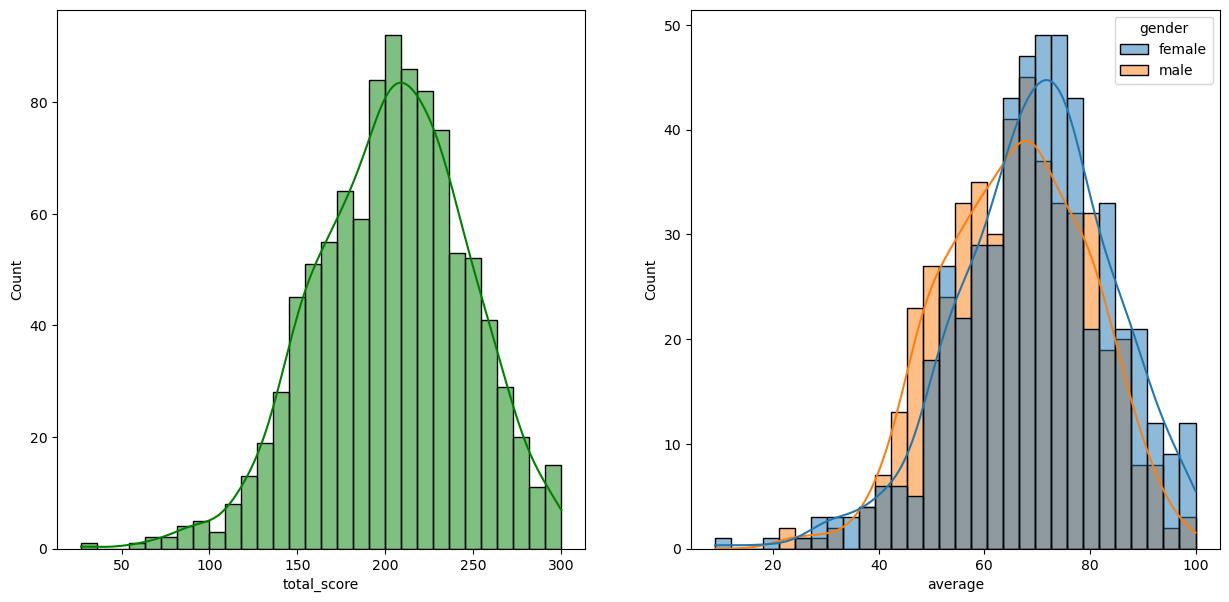

In [47]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df , x = 'total_score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df , x = 'average', bins=30, kde=True, hue='gender')
plt.show()


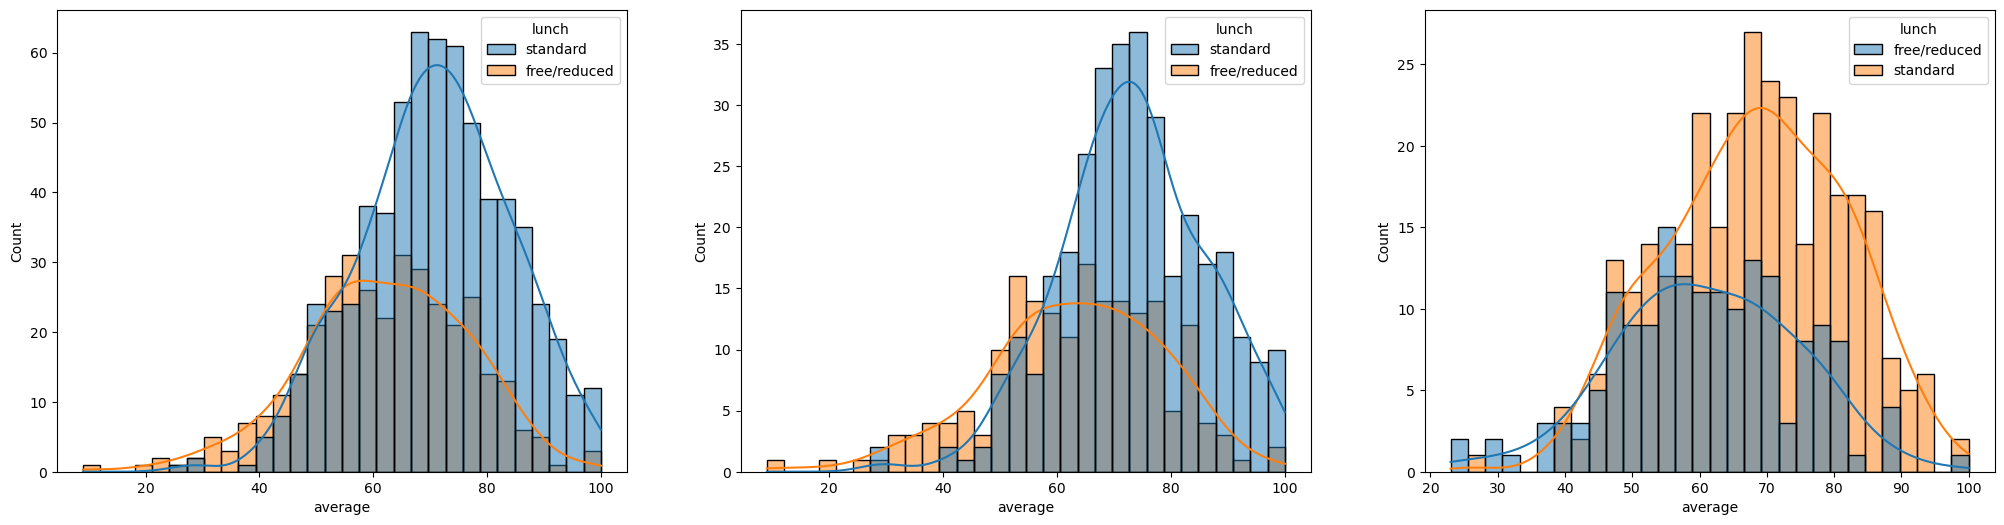

In [ ]:



plt.subplot(131)
sns.histplot(data=df , x = 'average', bins=30, kde=True, hue = 'lunch')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'] , x = 'average', bins=30, kde=True, hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'] , x = 'average', bins=30, kde=True, hue='lunch')
plt.show()

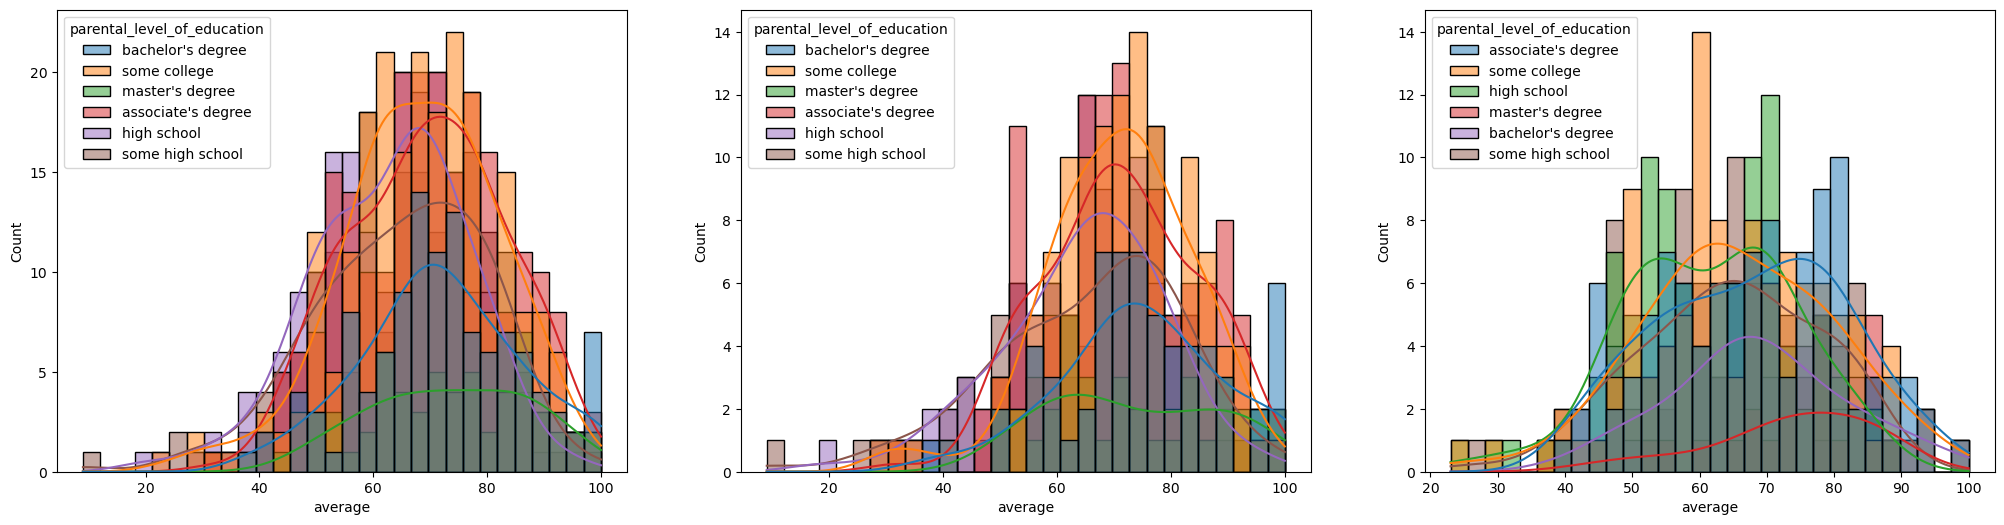

In [57]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df , x = 'average', bins=30, kde=True, hue = 'parental_level_of_education')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'] , x = 'average', bins=30, kde=True, hue='parental_level_of_education')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'] , x = 'average', bins=30, kde=True, hue='parental_level_of_education')
plt.show()

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df , x = 'average', bins=30, kde=True, hue = 'race_ethnicity')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'] , x = 'average', bins=30, kde=True, hue='race_ethnicity')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'] , x = 'average', bins=30, kde=True, hue='race_ethnicity')
plt.show()